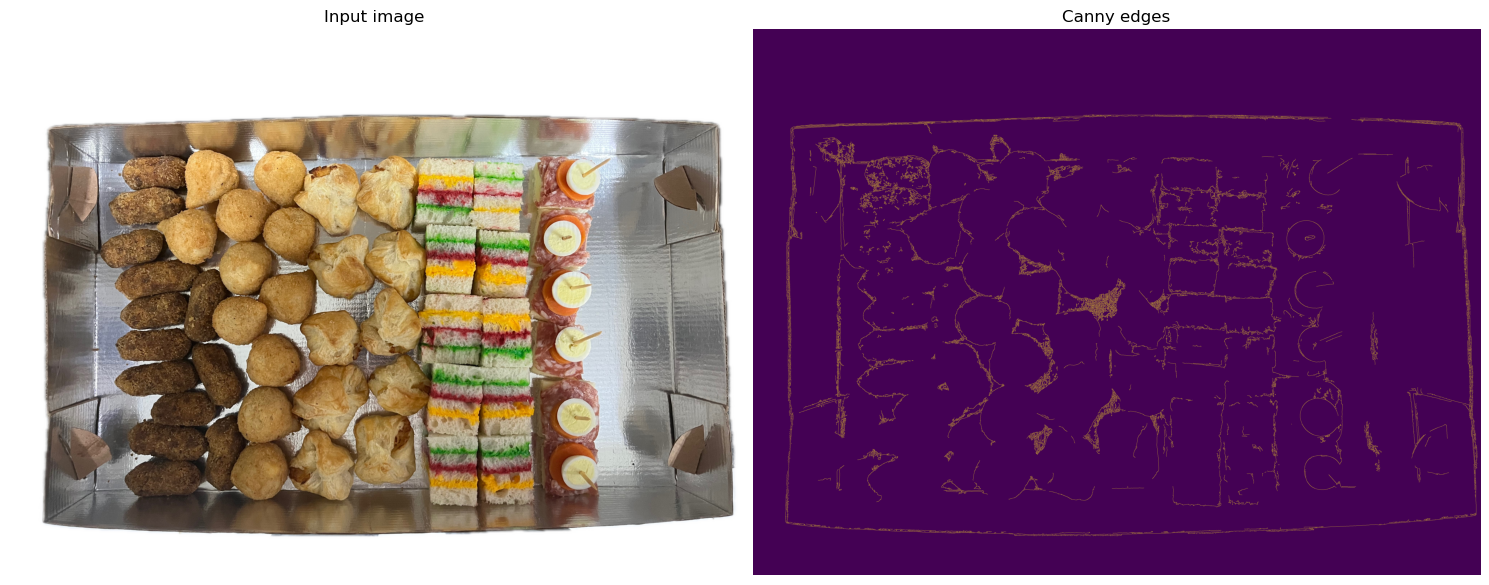

In [21]:
from ipywidgets import interact, interact_manual
import cv2
from matplotlib import pyplot as plt

IMAGE_PATH = 'dataset/trim/IMG_2426.jpeg'


def show2images(image1, image2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image1)
    ax[0].set_title(title1)

    ax[1].imshow(image2)
    ax[1].set_title(title2)

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()


def applyCanny(source, threshold1, threshold2, apertureSize, L2gradient):
    image = cv2.imread(source) 
    if image is None:
        print("Error: Could not load image.")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    blurred_image = cv2.bilateralFilter(gray_image, 50, 90, 90)
    #blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    edges = cv2.Canny(blurred_image, threshold1=threshold1, threshold2=threshold2, apertureSize=apertureSize, L2gradient=L2gradient) 

    show2images(image, edges, 'Input image', 'Canny edges')


#interact_manual(applyCanny, source=IMAGE_PATH, threshold1=65, threshold2=195, apertureSize=3, L2gradient=True)

# NOTE: best with gaussian blurred at 65/195
# or bilaterealFilter at 15/45
applyCanny(source=IMAGE_PATH, threshold1=15, threshold2=45, apertureSize=3, L2gradient=True)

Passo prévio de remoção de fundo. Optei depois por utilizar images já editadas de /trim

TODO: Não deveria estar cinza?

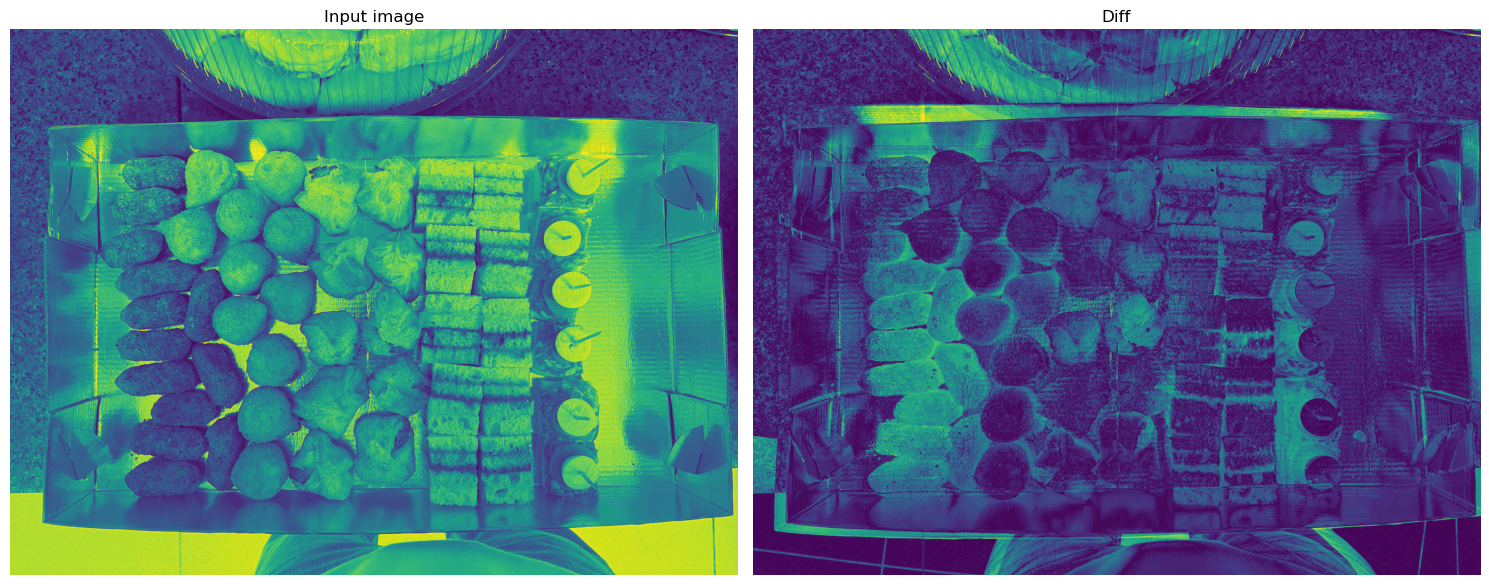

In [ ]:
def removeBackground(source, ref_source):
    image = cv2.imread(source, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not load image.")
        return
    
    ref_image = cv2.imread(ref_source, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not load image.")
        return
    
    change = cv2.absdiff(image, ref_image)
    show2images(image, change, 'Input image', 'Diff')


removeBackground('dataset/jpeg/IMG_2426.jpeg', 'dataset/jpeg/IMG_2455.jpeg')